# Đồ án cuối kỳ: Phân tích dữ liệu việc làm của sinh viên

**1. Thái Hoàng Huy - 18127109**

**2. Trần Quốc Huy - 18127111**

## 1. Thu thập dữ liệu

- **Nội Dung** : Bộ [dữ liệu](https://www.kaggle.com/benroshan/factors-affecting-campus-placement) này chứa số liệu thống kê về vị trí của sinh viên từ một khuôn viên trường Jain University Bangalore, nơi mà tác giả đang học MBA. Nó bao gồm tỷ lệ phần trăm điểm các chuyên ngành từ các trường trung học cơ sở trở lên. Nó cũng chứa thông tin trình độ chuyên môn, kinh nghiệm làm việc và đề nghị trả lương cho những sinh viên đã được nhận vào một vị trí nào đó.

- **Lisence** : CC0 - Public Domain

- **Thông Tin Thêm** : Tác giả được cung cấp dữ liệu từ giáo sư của mình

### Các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Đọc dữ liệu

In [2]:
# df = pd.read_csv(folder_path + 'Placement_Data_Full_Class.csv')
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## 2. Khám phá dữ liệu

### Ý nghĩa của các cột

- **sl_no**: Mã phân biệt mỗi học sinh.
- **gender**: Giới tính (M - con trai và F - con gái).
- **ssc_p**: Điểm lớp 10.
- **ssc_b**: Hội đồng giáo dục trường cấp 2.
- **hsc_p**: Điểm lớp 12.
- **hsc_b**: Hội đồng giáo dục trường cấp 3.
- **hsc_s**: Chuyên ngành trường cấp 3.
- **degree_p**: Điểm bằng đại học.
- **degree_t**: Lĩnh vực học.
- **workex**: Kinh nghiệm làm việc.
- **etest_p**: Điểm bài kiểm tra nhân sự.
- **specialisation**: Chuyên ngành sau đại học (MBA).
- **mba_p**: Điểm MBA (Master of Business Administration) [See more](https://www.mba.com/explore-programs/choose-and-compare-programs/what-is-an-mba). 
- **status**: Tình trạng công việc.
- **salary**: Tiền lương.

### Kích thước dữ liệu

In [3]:
num_rows = df.shape[0]
print("Số dòng: ",num_rows)
num_cols = df.shape[1]
print("Số cột: ",num_cols)

Số dòng:  215
Số cột:  15


### Các giá trị trùng trong dữ liệu

In [4]:
have_duplicated_rows = df.duplicated().sum()
have_duplicated_rows

0

### Các giá trị rỗng

In [5]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Kiểm tra có dòng nào không thoả điều kiện nếu học sinh không có việc làm thì sẽ không có lương hay không?

In [6]:
df[(df.status == "Not Placed") & (df.salary.notna() | df.salary == 0)].shape[0]

67

- Theo kết quả ở trên, bộ dữ liệu có tới 67/215 giá trị ở cột salary là giá trị rỗng.
- Không thể xoá các dòng chứa giá trị rỗng này đi, vì làm vậy sẽ làm giảm tới hơn 30% số lượng dữ liệu.

=> Các giá trị rỗng này sẽ được điền thành giá trị '0' hoặc median của cột salary nhằm tạo sự bình đẳng.

In [7]:
df['salary'].fillna(value = 0, inplace = True)

### Đặc trưng của dữ liệu

#### Kiểu dữ liệu

In [8]:
value = df.dtypes
key = df.columns.values
col_dtypes = dict(zip(key,value))
col_dtypes

{'sl_no': dtype('int64'),
 'gender': dtype('O'),
 'ssc_p': dtype('float64'),
 'ssc_b': dtype('O'),
 'hsc_p': dtype('float64'),
 'hsc_b': dtype('O'),
 'hsc_s': dtype('O'),
 'degree_p': dtype('float64'),
 'degree_t': dtype('O'),
 'workex': dtype('O'),
 'etest_p': dtype('float64'),
 'specialisation': dtype('O'),
 'mba_p': dtype('float64'),
 'status': dtype('O'),
 'salary': dtype('float64')}

#### Kiểu dữ liệu số

In [9]:
numerical_df = df.select_dtypes(exclude='object')
numerical_df =numerical_df.drop(columns=['sl_no'])
numerical_df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


***Nhận Xét***
- Nhìn vô bảng trên, có thể thấy các giá trị ở các cột ngoài cột 'salary' đều bình thường, không có gì bất ổn.
- Lý do dẫn tới việc kết luận cột salary có dữ liệu hơi bất thường là độ lệch chuẩn có giá trị lớn và giá trị max có độ lệch rất xa so với giá trị khác.

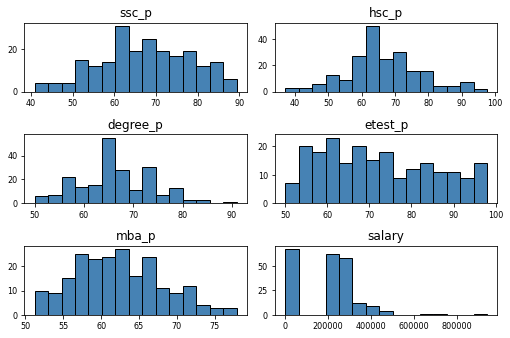

In [10]:
numerical_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

/opt/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


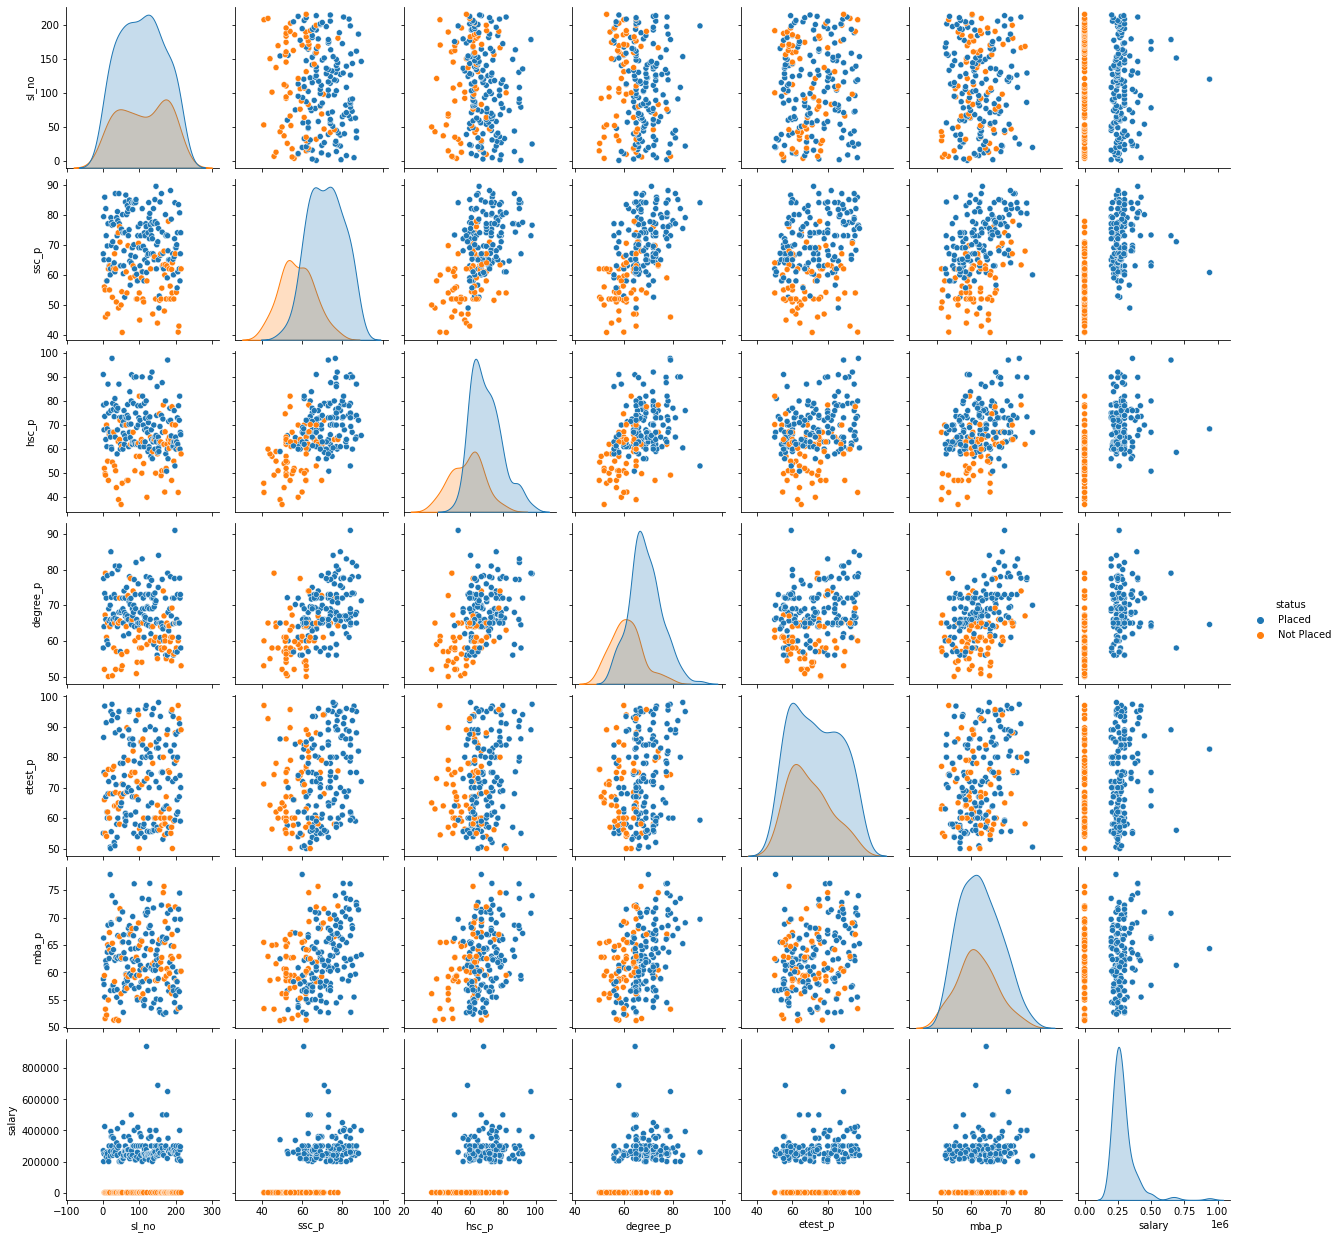

In [11]:
sns.pairplot(data=df, hue ='status')

Độ tương quan giữa các thuộc tính số trong dữ liệu

<AxesSubplot:>

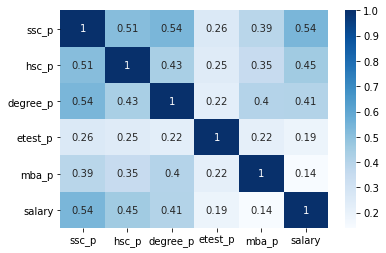

In [12]:
sns.heatmap(numerical_df.corr(), annot = True, cmap="Blues")

**NHẬN XÉT:**

Từ biểu diễn bên trên ta có thể suy ra các thuộc tính số trong dữ liệu không có tương quan dương với nhau nên không cần loại bỏ bất kỳ dòng dữ liệu nào.

#### Kiểu dữ liệu object

In [13]:
categorical_df = df.select_dtypes(include='object')
categorical_df.dtypes

gender            object
ssc_b             object
hsc_b             object
hsc_s             object
degree_t          object
workex            object
specialisation    object
status            object
dtype: object

Giới tính

<AxesSubplot:>

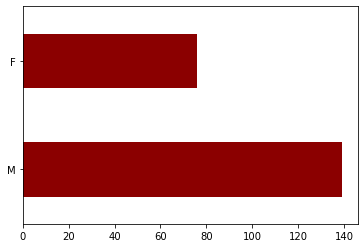

In [14]:
categorical_df['gender'].value_counts().plot.barh(color='darkred')

Hội đồng giáo dục trường cấp 2

<AxesSubplot:>

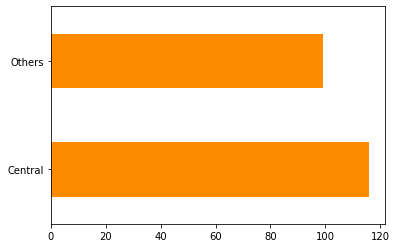

In [15]:
categorical_df['ssc_b'].value_counts().plot.barh(color='darkorange')

Hội đồng giáo dục trường cấp 3

<AxesSubplot:>

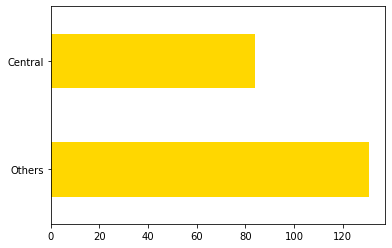

In [16]:
categorical_df['hsc_b'].value_counts().plot.barh(color='gold')

Ngành học năm cấp 3

<AxesSubplot:>

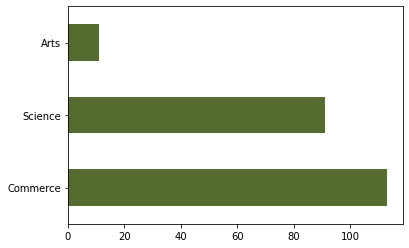

In [17]:
categorical_df['hsc_s'].value_counts().plot.barh(color='darkolivegreen')

Chuyên ngành đại học

<AxesSubplot:>

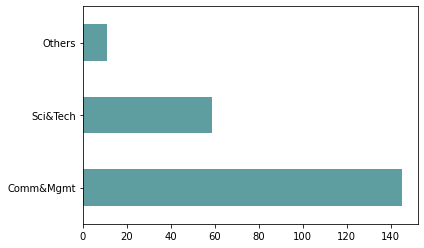

In [18]:
categorical_df['degree_t'].value_counts().plot.barh(color='cadetblue')

**Chú thích:**
- Comm&Mgmt: Communication & Management (Quản lý truyền thông)
- Sci&Tech: Science and Technology (Khoa học và Công nghệ)

Kinh nghiệm làm việc

<AxesSubplot:>

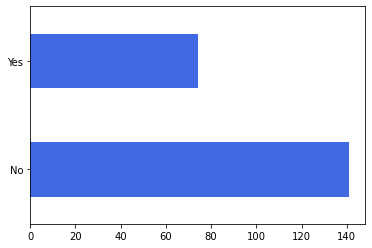

In [19]:
categorical_df['workex'].value_counts().plot.barh(color='royalblue')

Chuyên ngành sau đại học (MBA)

<AxesSubplot:>

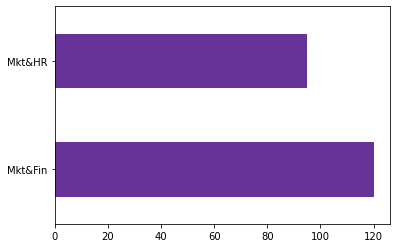

In [20]:
categorical_df['specialisation'].value_counts().plot.barh(color='rebeccapurple')

**Chú thích:**
- Mkt&HR: Marketing & Human Resource (Tiếp thị và Nhân sự)
- Mkt&Fin: Marketing and Finance (Tiếp thị và Tài chính)

Tình trạng công việc

<AxesSubplot:>

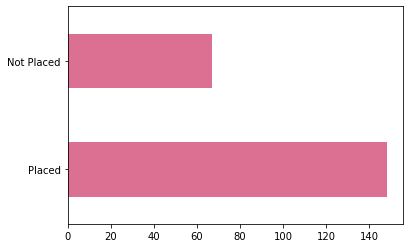

In [21]:
categorical_df['status'].value_counts().plot.barh(color='palevioletred')

**Nhận xét:**
- Dữ liệu bị mất cân bằng trong đại đa số các cột có thuộc tính phân loại.
- Ở các cột ngành học năm cấp 3, chuyên ngành đại học và sau đại học,dữ liệu có xu hướng nghiên về các chuyên ngành liên quan về kinh tế, thương mại.

### Khám phá sâu hơn về dữ liệu

Tỉ lệ học sinh cấp 3 học Science tiếp tục học chuyên ngành về Sci&Tech là bao nhiêu?

In [22]:
science_stu = df[df.hsc_s == "Science"]
sci_rate = science_stu[science_stu.degree_t=="Sci&Tech"].size/science_stu.size
sci_rate

0.6153846153846154

Tỉ lệ học sinh cấp 3 học Commerce tiếp tục học chuyên ngành về Comm&Mgmt là bao nhiêu?

In [23]:
com_stu = df[df.hsc_s == "Commerce"]
com_rate = com_stu[com_stu.degree_t=="Comm&Mgmt"].size/com_stu.size
com_rate

0.9646017699115044

Sinh viên có kinh nghiệm thì lương có cao hơn sinh viên chưa có?

In [24]:
stu = df[df.status == "Placed"]
ex_stu = stu[stu.workex=="Yes"]
ex_rate = ex_stu.salary.sum()/ex_stu.size

iex_stu = stu[stu.workex=="No"]
iex_rate = iex_stu.salary.sum()/iex_stu.size

print("Tiền lương trung bình của sinh viên có kinh nghiệm: ",ex_rate)
print("Tiền lương trung bình của sinh viên chưa có kinh nghiệm: ",iex_rate)

Tiền lương trung bình của sinh viên có kinh nghiệm:  20217.708333333332
Tiền lương trung bình của sinh viên chưa có kinh nghiệm:  18501.5873015873


## 3. Đặt câu hỏi

### 3.1 Chuyên ngành được các doanh nghiệp nhận vào làm nhiều ?
Câu hỏi "Học ngành gì không sợ thất nghiệp ??" luôn là vấn đề lớn mà học sinh và phụ huynh luôn quan tâm. Việc phân tích xem các doanh nghiệp có nhu cầu cao ở nhóm ngành nào, từ đó đưa ra các định hướng phù hợp sẽ giúp sinh viên hạn chế được tình trạng thất nghiệp sau khi ra trường, cũng như thuận tiện hơn cho việc phát triển khả năng của bản thân.

### 3.2 Giới tính của sinh viên có ảnh hưởng tới lương và tình trạng có việc làm ?
Đối với nhiều nhóm ngành, luôn tồn tại những tư tưởng rằng ngành này chỉ phù hợp với *Nam* hoặc với *Nữ*. Câu hỏi trên sẽ trả lời cho việc liệu rằng quan điểm này có đúng hay không ? 

### 3.3 Điểm số có ảnh hưởng đến việc làm của sinh viên hay không?
Điểm số là một thước đo của các nhà tuyển dụng, đặc biệt là với các sinh viên chưa có kinh nghiệm. Nhưng liệu rằng đây có phải là yếu tố quyết định ảnh hưởng việc làm của sinh viên hay không ? Nếu ảnh hưởng thì ảnh hưởng tới mức độ nào. Việc chứng minh được điểm số có ảnh hưởng đến việc làm của sinh viên sẽ giúp họ có thể cố gắng từ bây giờ để đạt số điểm cao nhất có thể nhằm tăng cơ hội việc làm.

### 3.4 Điểm số có ảnh hưởng tới tiền lương của học sinh hay không?

Điểm số là một thước đo của các nhà tuyển dụng, đặc biệt là với các sinh viên chưa có kinh nghiệm. Nhưng liệu rằng đây có phải là yếu tố quyết định ảnh hưởng lương của sinh viên hay không ? Nếu ảnh hưởng thì ảnh hưởng tới mức độ nào. Việc chứng minh được điểm số có ảnh hưởng đến tiền lương của sinh viên sẽ giúp họ có thể cố gắng từ bây giờ để đạt số điểm cao nhất có thể.

## 4. Tiền xử lý dữ liệu

Nếu để ý kĩ thì tất cả các cột dữ liệu số trong tập dữ liệu đều là điểm số của học sinh lần lượt ở năm lớp 10, lớp 12, đại học và sau đại học. Có thể thấy việc phân tích các giá trị liên tục trong trường hợp này khá phức tạp và mang lại ít giá trị hữu ích cộng thêm việc các giá trị điểm này đã được rời rạc hoá dưới dạng phân loại:
 * A	90%-100%
 * B	80%–89%
 * C	70%–79%
 * D	60%–69%
 * F	0%-59%

In [25]:
def s(x):
    if x >= 90.0:
        return 'A'
    elif x >= 80.0:
        return 'B'
    elif x >= 70.0:
        return 'C'
    elif x >= 60.0:
        return 'D'
    else:
        return 'F'
    
col = numerical_df.drop(columns=['salary']).columns
new_df = df.copy()
for i in col:
    new_df[i] = new_df[i].apply(s)
new_df # chuyển điểm từ dạng số về dạng phân lớp

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,D,Others,A,Others,Commerce,F,Sci&Tech,No,F,Mkt&HR,F,Placed,270000.0
1,2,M,C,Central,C,Others,Science,C,Sci&Tech,Yes,B,Mkt&Fin,D,Placed,200000.0
2,3,M,D,Central,D,Central,Arts,D,Comm&Mgmt,No,C,Mkt&Fin,F,Placed,250000.0
3,4,M,F,Central,F,Central,Science,F,Sci&Tech,No,D,Mkt&HR,F,Not Placed,0.0
4,5,M,B,Central,C,Central,Commerce,C,Comm&Mgmt,No,A,Mkt&Fin,F,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,B,Others,B,Others,Commerce,C,Comm&Mgmt,No,A,Mkt&Fin,C,Placed,400000.0
211,212,M,F,Others,D,Others,Science,C,Sci&Tech,No,C,Mkt&Fin,F,Placed,275000.0
212,213,M,D,Others,D,Others,Commerce,C,Comm&Mgmt,Yes,F,Mkt&Fin,D,Placed,295000.0
213,214,F,C,Others,D,Others,Commerce,F,Comm&Mgmt,No,C,Mkt&HR,D,Placed,204000.0


### Các dữ liệu phân loại mới có gì ?

Điểm lớp 10

In [26]:
colors = sns.color_palette('pastel')[0:10]

<AxesSubplot:ylabel='ssc_p'>

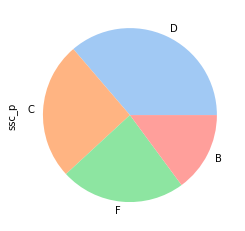

In [27]:
new_df['ssc_p'].value_counts().plot.pie(colors=colors[0:4])

Điểm 12

<AxesSubplot:ylabel='hsc_p'>

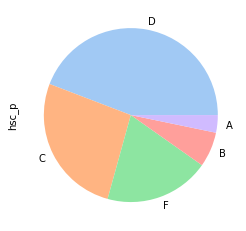

In [28]:
new_df['hsc_p'].value_counts().plot.pie(colors=colors)

Điểm đại học

<AxesSubplot:ylabel='degree_p'>

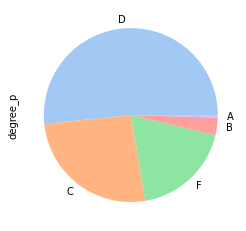

In [29]:
new_df['degree_p'].value_counts().plot.pie(colors=colors)

Điểm bài kiểm tra nhân sự

<AxesSubplot:ylabel='etest_p'>

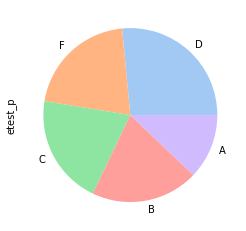

In [30]:
new_df['etest_p'].value_counts().plot.pie(colors = colors)

Điểm sau đại học

<AxesSubplot:ylabel='mba_p'>

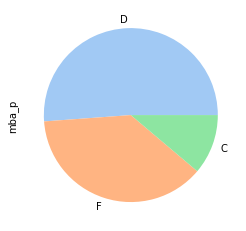

In [31]:
new_df['mba_p'].value_counts().plot.pie(colors = colors)

## 6. Trả lời câu hỏi

### Chuyên ngành được các doanh nghiệp nhận vào làm nhiều ?

Bởi vì dữ liệu ban đầu thì đa phần ta thấy dữ liệu bị mất cân bằng rõ rệt giữa các chuyên ngành về thương nghiệp và các ngành khác, vì vậy thay vì tính số lượng sinh viên có việc làm của từng chuyên ngành thì ta sẽ tính tỉ lệ có việc của mỗi chuyên ngành.

#### Chuyên ngành lớp cấp 3

In [32]:
hsc_s = new_df[new_df.status=="Placed"]['hsc_s'].value_counts()/new_df['hsc_s'].value_counts()
hsc_s

Commerce    0.699115
Science     0.692308
Arts        0.545455
Name: hsc_s, dtype: float64

#### Chuyên ngành đại học

In [33]:
degree_t = new_df[new_df.status=="Placed"]['degree_t'].value_counts()/new_df['degree_t'].value_counts()
degree_t

Comm&Mgmt    0.703448
Sci&Tech     0.694915
Others       0.454545
Name: degree_t, dtype: float64

#### Chuyên ngành sau đại học

In [34]:
specialisation = new_df[new_df.status=="Placed"]['specialisation'].value_counts()/new_df['specialisation'].value_counts()
specialisation

Mkt&Fin    0.791667
Mkt&HR     0.557895
Name: specialisation, dtype: float64

**Nhận xét:**

- Đối với chuyên ngành cấp 3 và đại học thì tỉ lệ có việc của các sinh viên là như nhau ở những phân lớp chính và khá chênh lệnh ở các phân lớp phụ (Arts ở chuyên ngành cấp 3 và Others ở chuyên ngành đại học).

- Đối với chuyên ngành sau đại học, ta thấy rằng tỉ lệ sinh viên có việc làm ở chuyên ngành về tài chính hơn hẳn chuyên ngành về nhân sự với hơn 20%.

### Liệu rằng giới tính của sinh viên có ảnh hưởng tới lương và tình trạng có việc làm ?

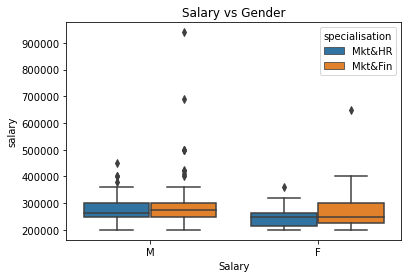

In [35]:
placed_df = new_df[new_df['status'] == 'Placed']
sns.boxplot(x=placed_df['gender'], y = placed_df['salary'], hue='specialisation', data=placed_df)
plt.title("Salary vs Gender")
plt.xlabel("Gender")
plt.xlabel("Salary")
plt.show()

***Nhận Xét***

- Biểu đồ "Box and whiskers" rất hữu ích để tìm mối quan hệ giữa biến số và biến phân loại.

- Theo biểu đồ ở trên, những điểm nhiễu hoặc giá trị cực đoan trong cột salary nằm ở nam nhiều hơn nữ. Một trong những giả thuyết hợp lý là một số ứng viên nam được tuyển dụng vào vị trí cao hơn trong một công ty, đó là lý do tại sao họ nhận được nhiều lương hơn.

- Mức lương trung bình của nữ thấp hơn của Nam ở cả 2 nhóm ngành, lý do có thể đến từ việc bộ dữ liệu này có sự mất căn bẳng về giới tính.

=> Kết luận sau có thể chỉ đúng với bộ dữ liệu này rằng có thể có một sự chênh lệch nhỏ giữa mức lương mà nam hoặc nữ nhận được .

### Điểm số có ảnh hưởng đến việc làm của sinh viên hay không?

#### Điểm số của sinh viên có công việc

In [36]:
placed_stu = df[df.status=="Placed"][col]
placed_stu = placed_stu.sum(axis=0)/placed_stu.shape[0]
placed_stu

ssc_p       71.721486
hsc_p       69.926554
degree_p    68.740541
etest_p     73.238041
mba_p       62.579392
dtype: float64

#### Điểm số của sinh viên không nhận được việc

In [37]:
not_placed_stu = df[df.status=="Not Placed"][col]
not_placed_stu = not_placed_stu.sum(axis=0)/not_placed_stu.shape[0]
not_placed_stu

ssc_p       57.544030
hsc_p       58.395522
degree_p    61.134179
etest_p     69.587910
mba_p       61.612836
dtype: float64

#### So sánh dữ liệu từ hai nhóm

<AxesSubplot:>

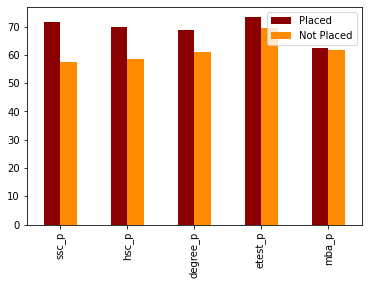

In [38]:
result = pd.DataFrame({'Placed': placed_stu, 'Not Placed': not_placed_stu})
#score_student_i.plot.bar(color=['darkred','darkorange','gold','darkseagreen','royalblue'])
result.plot.bar(color=['darkred','darkorange'])

***Nhận Xét***

- Theo kết quả phân tích bên trên, ta có thể thấy điểm trung bình của sinh viên có việc làm hơn hẳn khi so với các sinh viên không có việc làm ở tất cả các cột điểm.

- Từ đó, ta có thể thấy điểm số có ảnh hưởng đến tình trạng công việc của sinh viên.

#### Mở rộng

Phần này sẽ kiểm tra xem điểm số có phải nhân tố quyết định trong việc một sinh viên có được nhận vào làm hay không?

In [39]:
# Mẫu phố biến của sinh viên có việc làm
# Bỏ các cột liên quan đến điểm
frequency_item_df = new_df[new_df['status'] == 'Placed'].drop(columns = ['ssc_p','sl_no', 'gender','hsc_p','degree_p','etest_p' ,'mba_p', 'status','salary'])
frequency_item_df = frequency_item_df.value_counts().reset_index(name = 'count')
frequency_item_df = frequency_item_df[(frequency_item_df['count'] > 3)]
frequency_item_df

,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,count
0,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,15
1,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,13
2,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,9
3,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,8
4,Others,Others,Science,Sci&Tech,Yes,Mkt&Fin,8
5,Central,Central,Commerce,Comm&Mgmt,Yes,Mkt&Fin,8
6,Others,Others,Science,Sci&Tech,No,Mkt&Fin,8
7,Central,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,8
8,Central,Central,Commerce,Comm&Mgmt,No,Mkt&HR,6
9,Central,Central,Science,Sci&Tech,Yes,Mkt&HR,5


In [40]:
# Mẫu phố biến của sinh viên không có việc làm
# Bỏ các cột liên quan đến điểm
frequency_item_df_u = new_df[new_df['status'] == 'Not Placed'].drop(columns = ['ssc_p','sl_no', 'gender','hsc_p','degree_p','etest_p' ,'mba_p', 'status','salary'])
frequency_item_df_u = frequency_item_df_u.value_counts().reset_index(name = 'count')
frequency_item_df_u = frequency_item_df_u[(frequency_item_df_u['count'] > 3)]
frequency_item_df_u

,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,count
0,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,6
1,Central,Central,Commerce,Comm&Mgmt,No,Mkt&HR,5
2,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,5
3,Central,Central,Science,Sci&Tech,No,Mkt&HR,5
4,Central,Others,Science,Comm&Mgmt,No,Mkt&HR,4
5,Others,Others,Science,Sci&Tech,No,Mkt&HR,4
6,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,4


Số kiểu mẫu phổ biến bị trùng ở hai tập

In [41]:
df_merge = pd.merge(frequency_item_df.drop(['count'],axis=1), frequency_item_df_u.drop(['count'],axis=1),how='inner')
df_merge

,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin
1,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR
2,Central,Central,Commerce,Comm&Mgmt,No,Mkt&HR
3,Others,Others,Science,Sci&Tech,No,Mkt&HR
4,Central,Others,Science,Comm&Mgmt,No,Mkt&HR


***Nhận Xét***

- Theo kết quả phân tích bên trên, với hỗ trợ (support) là 3 ta thấy có tới 5 mẫu giống nhau ở cả hai tập có việc làm và không có việc làm, tức là có rất ít sự phân biệt về mặt tính chất giữa các sinh viên đến từ hai lớp khác nhau nếu không xét đến vấn đề điểm số.

- Đặc điểm chung ở 5 mẫu chung phổ biến đều xuất hiện ở cả hai tập là các sinh viên này đều không có kinh nghiệm. Điều này rất đúng với thực tế là cả hai sinh viên A và B đều không có kinh nghiệm thì điểm số là một nhân tố quan trọng quyết định đến việc một sinh viên có được nhận vào làm hay không.

### Điểm số có ảnh hưởng tới tiền lương của học sinh hay không?

#### Bước 1:
Chúng ta sẽ so sánh sự khác biệt về điểm số và các thuộc tính khác của sinh viên ở 2 nhóm.

##### Nhóm 1 (Top 50% sinh viên có điểm cao nhất)

<AxesSubplot:>

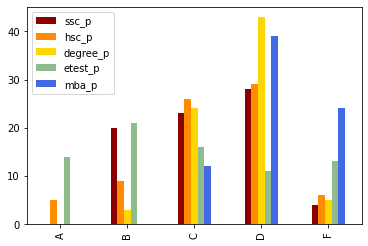

In [42]:
# lấy ra các cột điểm
def count_value(s):
    return s.value_counts()
half = new_df[new_df.status=="Placed"]['salary'].quantile(0.5)
half_data = new_df[(new_df.status=="Placed")&(new_df.salary>=half)][col]
half_data = half_data.apply(count_value)
half_data.fillna(value = 0, inplace = True)
half_data.plot.bar(color=['darkred','darkorange','gold','darkseagreen','royalblue'])

In [43]:
half_data.sum(axis=1)

A     19.0
B     53.0
C    101.0
D    150.0
F     52.0
dtype: float64

##### Nhóm 2 (Top 50% sinh viên có điểm thấp nhất)

<AxesSubplot:>

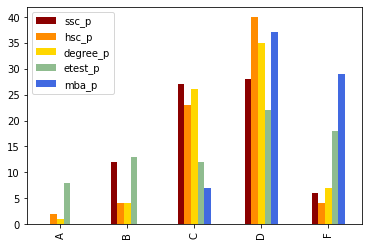

In [44]:
# lấy ra các cột điểm
below_half_data = new_df[(new_df.status=="Placed")&(new_df.salary<half)][col]
below_half_data = below_half_data.apply(count_value)
below_half_data.fillna(value = 0, inplace = True)
below_half_data.plot.bar(color=['darkred','darkorange','gold','darkseagreen','royalblue'])

In [45]:
below_half_data.sum(axis=1)

A     11.0
B     33.0
C     95.0
D    162.0
F     64.0
dtype: float64

Số kiểu mẫu phổ biến bị trùng ở 2 tập

In [46]:
top_50 = new_df[(new_df.status=="Placed")&(new_df.salary>=half)].drop(columns = ['ssc_p','sl_no', 'gender','hsc_p','degree_p','etest_p' ,'mba_p', 'status','salary'])
top_50 = top_50.value_counts().reset_index(name = 'count')
top_50 = top_50[top_50['count']>3]

bot_50 = new_df[(new_df.salary<half)].drop(columns = ['ssc_p','sl_no', 'gender','hsc_p','degree_p','etest_p' ,'mba_p', 'status','salary'])
bot_50 = bot_50.value_counts().reset_index(name = 'count')
bot_50 = bot_50[bot_50['count']>3]

df_merge = pd.merge(top_50.drop(['count'],axis=1), bot_50.drop(['count'],axis=1),how='inner')
df_merge

,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin
1,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin
2,Others,Others,Science,Sci&Tech,No,Mkt&Fin
3,Others,Others,Science,Sci&Tech,Yes,Mkt&Fin
4,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR
5,Others,Others,Science,Sci&Tech,No,Mkt&HR
6,Central,Central,Commerce,Comm&Mgmt,Yes,Mkt&Fin
7,Central,Central,Commerce,Comm&Mgmt,No,Mkt&HR


***Nhận Xét***

- Chúng ta có thể dễ dàng nhìn thấy có sự chênh lệch rất rõ ràng về mặt điểm số. Cụ thể hơn là ở những sinh viên có lương càng cao thì điểm A, B, C có xu hướng nhiều hơn các nhóm khác và tương tự với những sinh viên có lương thấp thì điểm F sẽ nhiều hơn các sinh viên top đầu.

- Chính vì vậy mà ta có thể kết luận rằng điểm số không chỉ ảnh hưởng đến việc bạn có được nhận vào làm hay không mà còn ảnh hưởng đến mức lương của bạn.

- Điểm số là thang đo để đánh giá những sinh viên vừa ra trường nhưng không có kinh nghiệm. Điều này rút ra được từ số kiểu mẫu bị trùng ở ba tập: đa phần đều là sinh viên không có kinh nghiệm và cùng học cùng chuyên ngành nhưng lại có sự cách biệt về tiền lương khi đi làm.

#### Bước 2:
Tìm ra điểm nào ảnh hưởng nhiều nhất đến tiền lương?

In [47]:
score_aff_salary = df[df.status=="Placed"][numerical_df.columns]
score_aff_salary 

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
7,82.00,64.00,66.00,67.0,62.14,252000.0
...,...,...,...,...,...,...
209,62.00,72.00,65.00,67.0,56.49,216000.0
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0


#### Xét các thuộc tính điểm riêng lẻ

Biểu diễn tương quan giữa các loại điểm và tiền lương

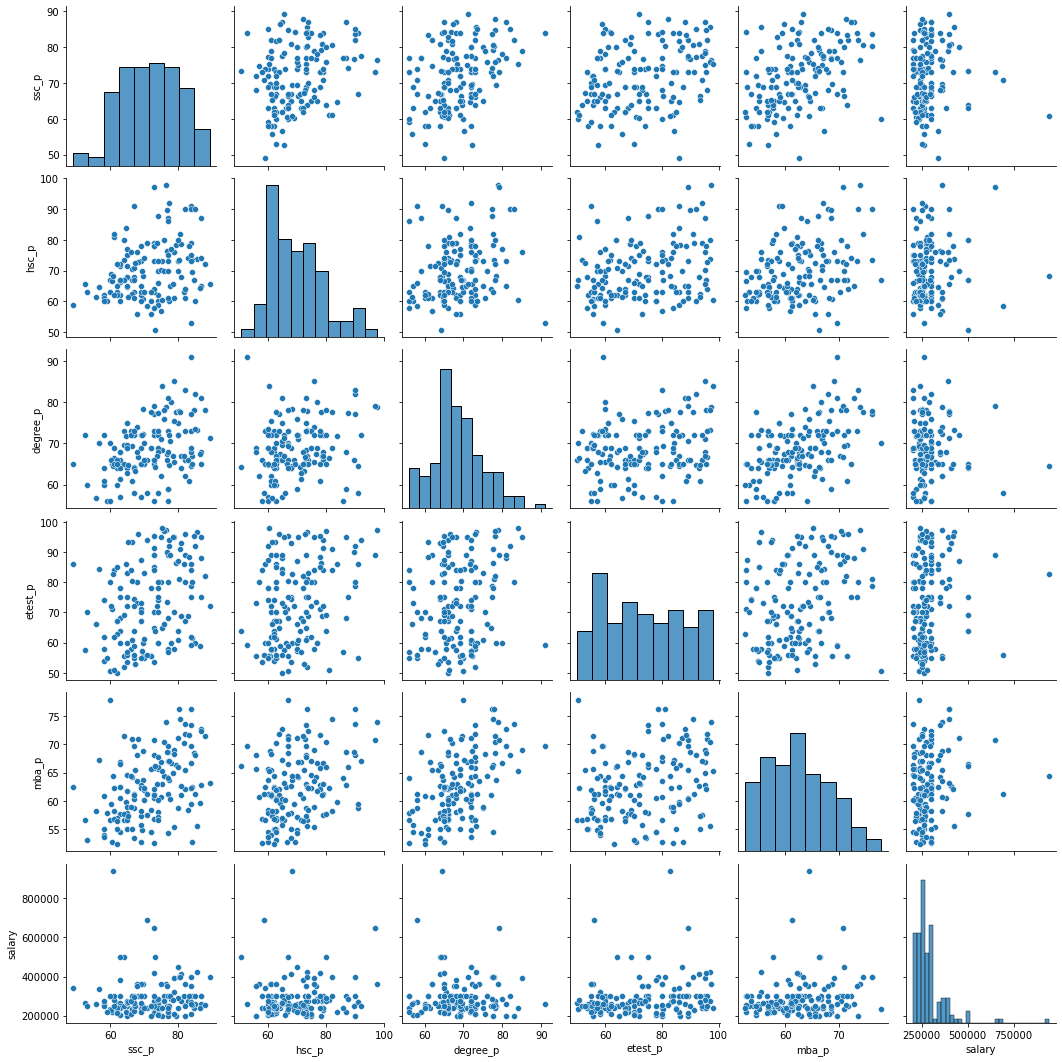

In [48]:
sns.pairplot(data=score_aff_salary,palette="Blues_d")

Độ tương quan giữa các điểm so với tiền lương

<AxesSubplot:>

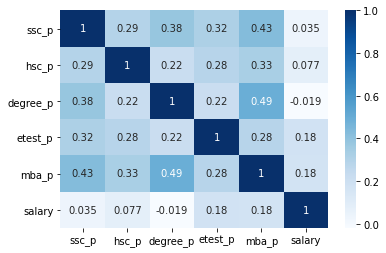

In [49]:
sns.heatmap(score_aff_salary.corr(), annot = True, cmap="Blues")

***Nhận Xét***

Nếu chỉ xét riêng lẻ từng thuộc tính điểm trong dữ liệu thì ta thấy được tiền lương của học sinh khi ra trường không hề có quan hệ dương đối với bất kỳ một cột điểm riêng lẻ nào hay nói đúng hơn nếu một cột điểm của sinh viên có cao đi chăng nữa cũng không ảnh hưởng đến tiền lương khi ra trường.

#### Xét trung bình các điểm phân theo tập hợp

Việc kiểm tra theo tập hợp điểm để kiểm tra xem liệu các điểm có tác động lẫn nhau hay không? Ví dụ: Một học sinh có điểm đại học cao nhưng lương lại thấp có thể là do một cột điểm nào đó trong cơ sở dữ liệu thấp.

In [50]:
#Input: list
#Output: subsets of list
def sub_lists(l):
    lists = [[]]
    for i in range(len(l) + 1):
        for j in range(i):
            lists.append(l[j: i])
    return lists

In [51]:
list_col = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']
sub = sub_lists(list_col)
max_corr = -1
max_list = None
for i in sub:
    tmp_score = score_aff_salary.drop(i+['salary'],axis=1).sum(axis=1)/(len(i)-1)
    frame = { 'sum': tmp_score, 'salary': score_aff_salary['salary']} 
    result = pd.DataFrame(frame)
    tmp = result.corr().iloc[0, 1]
    if tmp > max_corr:
        max_corr = tmp
        max_list = i
print('Độ tương quan cao nhất: ',max_corr)
print('Danh sách các điểm: ', max_list)

Độ tương quan cao nhất:  0.2120384186635129
Danh sách các điểm:  ['ssc_p', 'hsc_p', 'degree_p']


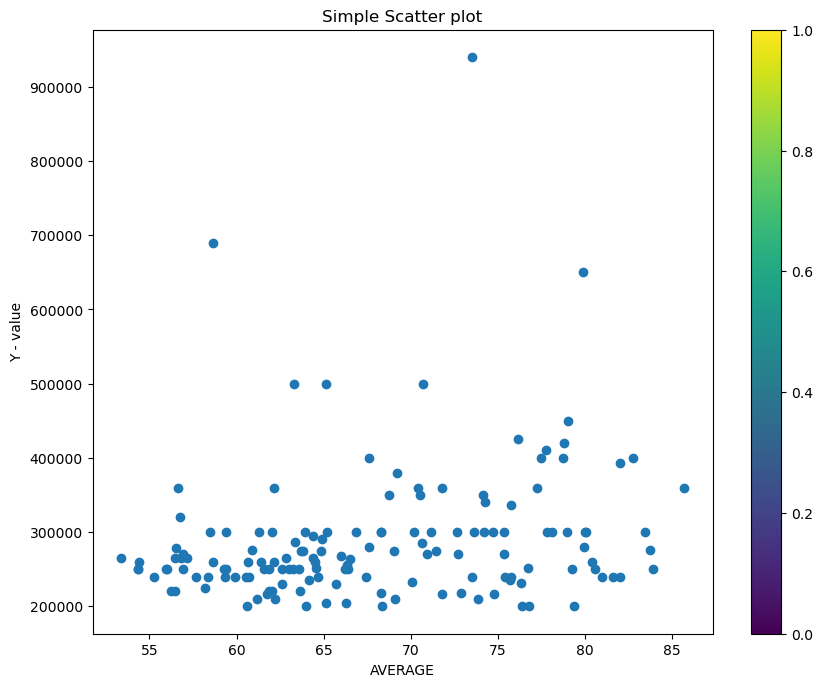

In [52]:
tmp_score = score_aff_salary.drop(max_list+['salary'],axis=1).sum(axis=1)/(len(max_list)-1)
frame = { 'sum': tmp_score, 'salary': score_aff_salary['salary']} 
result = pd.DataFrame(frame)
tmp = result.corr().iloc[0, 1]
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(tmp_score, score_aff_salary.salary, cmap='Spectral')
plt.colorbar()
plt.title('Simple Scatter plot')
plt.xlabel('AVERAGE')
plt.ylabel('Y - value')
plt.show()

***Nhận Xét***

- Có thể thấy dù lấy kết quả tương quan cao nhất từ tổ hợp các cột điểm nhưng kết quả chỉ đạt ngưỡng 0.21 (rất thấp khi so với 1). Từ đó ta chỉ có thể kết luận rằng kết hợp tuyến tính và xem các điểm điểm có độ quan trọng như nhau thì ít ảnh hưởng đến tiền lương. 

- Tổ hợp tuyến tính các giá trị có tương quan dương cao nhất trong bảng thống kế đó là điểm lớp 10, 12 và điểm đại học.

## 5. Reflection

***QUỐC HUY***

**Khó Khăn :**
- Khó khăn đầu tiên có thể kể tới là về việc sử dụng Git/Github trong quá trình làm nhóm.
- Không giỏi trong việc đưa ra quyết định xem nên vẽ loại đồ thị gì trong từng trường hợp.
- Chưa nhạy bén trong quá trình đặt câu hỏi cho bộ dữ liệu.

**Học :**
- Học được cách làm việc nhóm, trao đổi thông tin tốt hơn.
- Cải thiện kỹ năng sử dụng các thư viện trực quan hoá.

***HOÀNG HUY***

**Khó Khăn :**
- Chưa quen với việc sử dụng Git trong các thao tác phân nhánh.
- Chưa phân tích, giải quyết từng câu hỏi một cách cặn kẽ.

**Học :**
- Học được cách làm việc nhóm, trao đổi thông tin tốt.
- Hiểu được cách đặt câu hỏi và phân tích dữ liệu một cách cặn kẽ, sâu sắc.